# Some Numerical Experiments for Entropy Estimation in our data

## 1) Introduction

Electroneurophysiology is strongly based on the measurement and characterization of electrical signals given by live neurons, either *in vitro* or *in vivo*. This signal is offten recorded as a succesion on varying voltage measurements, done at precise, high frequencies. Along the years, the sampling and precision of these measurements have increased by several orders of magnitude. Moreover, the capacity to sample hundreds or thousands of sites simultaneously exists now, somethimes spread over macroscopic areas, such as the whole scalp of the head, or concentrated in very small areas, as in MMEAs (Massive Microelectrodes arrays). Such signals are very rich, and many efforts are done to characterize their complexity. It is usual to estimate the Entropy of the signal, and from there to use other derived measures such as Mutual Information or Transfer Entropy to search for causality between different channels. 

It turns out that the very first step is sometimes done routinelly and without much thought to fundamentals, and, as we shall show here, can lead to inconsistent or plain wrong results. As we shall see, Entropy in the sense of Shannon is often wrongly used, either due to conceptual laxitude or by error in the numerical algorithmic design. On the other hand, slighlty different calculations of Entropy may point different "complexities" in the data. As we are most interested in causality tests, we may focus on the most consistent and robusts definition of Entropy. We shall ask ourselves, following E.T.Jaynes: what is the probability density function of an electrophysiological signal? What are the consecuences of regarding it as continuous? For this we shall recall the strict applicability of Shanon's Entropy, its common confusion with the Differential and Thermodynamic Entropy, and explore and apply also the definition of Block Entropy for dynamic processes. 


## 2) Shannon Entropy

Shannon Entropy was devised as a measure of the complexity of a message encoded in discrete symbols. This is very important because its strict definition works very well in the case that the symbolization is given, but it fails ( spectacularly one may say ) if one takes instead a posible continuum of symbols, or one imposes another encoding on the symbols. Another caveat, often overlooked, is that Entropy of an array of symbols is invariant to ordering. One could in principle regard a signal as a sampling of random variables, reorder them, and obtain the same distribution, and thus, the same entropy. As an example, we could take every letter, punctuation mark and space of this parragraph, garble them into nonsense, and claim that they have the same Entropy as the original parragraph, and therefore, the same Information, which is as much nonsense as the random letters. But actually this is done implicitly in a lot of numerical estimations of Entropy.

Let us remember Shannon's original definition. Suppose that we have a set of discrete symbols, that is, a series of separeted, well defined values, which could be letters, digits, or any other symbol of such a kind. For simplicty we represent them as numbers, so $n$ discrete symbols would be $\{1, 2, \ldots n \}$. We call such a set an alphabet. Suppose that we have a random process that picks one by one these symbols and gives us a string of them. Such a string would be called a "message". Now let us suppose that the process is ergodic, that means, a very long "message" would be a good representation of the probabilities of the process that picks the symbols. Rigourosly speaking, the process would eventually be able to produce all the possible messages that those symbols permit, and their frecuencys would represent the probabilites of the random process. If we knew preciselly the probabilities $P$ of every symbol $s_j$, the entropy would be:
$$
H=-\sum_{j=1}^n P(s_j) \log (P (s_j))
$$
The base of the logarithm is usually taken as two, in which case the Entropy has as units the bit. In that case it can be interpreted as the average number of binary option question one has to make to guess symbol correctly.  A change of base of the logarythm is simply a change of units. We shall call this definition and only this one Shanon's Entropy.
We may not have the knowledge of the $P(s_j)$ directly, so we must infer them from the messages that we sample, and by doing so we may say that we are meassuring the Entropy of the messages and not of the process. This has to be taken into account if the messages are not "random enough".

Shanon, in his original paper, stated that the same idea could be done by extending it to continous distributions:
$$
H=-\int p(x) \log (p(x)) d x
$$
for a random continous variable and a probability distribution $p(x)$. It turns out that the limit does not converge. One could make some algebraic tricks to make it converge, but that would affect the interpretation. The fact that this looks identical to the Thermodynamic Entropy definition gives a false sense of legitimacy. Edwin T. Jaynes (cita) made a rigorous critique of this confucion and showed how a true relationship between Thermodynamic and Shannon's Entropy could be found. This is the formula that one encounters most often in the electrophysiological literature (citas) regarding pseudo continuous signals, and that is the address of our critique. We shall call this second definition "Differential Entropy", following the convention.


## Binarization of the Data and Symbolic Sequences

Researches take at face value the last equation and try to make a numerical aproximation to it. This is achieved first by estimating the distribution function of pseudo continous data. The usuall approach is first to make an histogram of the data. By so doing one is actually making a symbolization of the data ( called binarization, from bins, not from binary digits ), and if one applies Shannon's formula, then one is actually calculating the entropy of the distribution of symbols from that specific binarization. One could optimistically think that such a calculation could be a reasonable approach to a limiting form of the Differential Entropy, but that is not the case. A simple example sufices.
If one has a finite set of symbols ( we shall call it an alphabet from now on), such as $\{1,2\ldots,n\}$ and a random process that picks them with equal probabilies, the Shannon Entropy either of the process or of the distribution that dictates the process is 
$$
H=-\sum \frac{1}{n} \log \frac{1}{n} = \log n
$$
A simple proof shows that this has the highest entropy for a process with $n$ symbols, taking for example the entropy of one symbol to be higher or lower than the rest, and normalizing the others so that they are still equiprobable. Then It can be shown that this probability function has lower entropy. 

If one takes a continous interval over the real numbers, say, from $a$ to $b$, and one puts a flat probabilty distribution function over it, the Differential Entropy will be:
$$
H=-\int \frac{1}{b-a} \log \frac{1}{b-a} d x = \log (b-a)
$$
This somehow paralels the discrete Shanon entropy for equiprobable process, but it hides a trap.

Supose that we want to obtain the above by means of sampling a process, and that we put the data in bins of
equal length. After enough samples we may have a reasonable approach to an even distribution, but we are carefull
and don't take that for granted, so we approach the integral by a numerical discrete sum. Let us suppose that we have $n$ bins, and that each one turned to be more or less equally filled with data. Say that each bin holds 1/n of the total amount of data. Then we would obtain Shanons entropy for $n$ symbols, $H=\log n$. If we would try instead to make a Rieman sum over the expression $ p(x) \log (p(x))$ we end with another result: The bins have lenght $\Delta x= (b-a)/n$, and $p(x)=1/(b-a)$. 
the Integral form by the next sum:
$$
\tilde{H}=-\sum p_n(x) \log p_n(x) \Delta x \\
=-\sum \frac{1}{b-a}\log (\frac{1}{b-a}) \frac{b-a}{n} \\
= \log (b-a)
$$
The Riemann sum in this case converges trivialy to the Integral form. But the numerical sampling does not! In fact, if we refine the partition of our data (and have enough data to spread them over the new bins), the Shannon Entropy begins to grow, as $\log n$. What is going on? Two things. The most overlooked is that $p(x)$ *is not* a probability: it needs to be multiplied by $dx$ to become one. The other problem is that  Shannon's entropy is the entropy of the *partition itself*. The partition induces probabilites (discrete ones) and is a symbolization of the data. The Riemman Integral does not depend on the partition, as long as it converges uniformly. The Entropies do not match each other because they are measuring different things.

People familiar with Ergodic Theory shall recognize that these kind of measures, which depend on the partition, are usefull, but one cannot omit stating the partition when using them. Moreover, given that a partition is a symbolization, how can we chose the right partition? We cannot approach with experimental data the Riemman sum, except on very simple examples. 

We shall use some experimental data in the following section to investigate further this points.


### A numerical example

We shall show some calculations derived from using naively the mentioned approach. Our data comes from electrophysiological experiments, recorded with the BioCAM form BrainWave, a MMEA that has 4095 recording electrodes over an area of 2.27mm by 2.27 mm. In the data shown below, the data sampling rate was of 7.022 KHz.

In [1]:
# some auxiliary libraryes for ploting and dealing with HDF5 files
using HDF5, StatsBase, Statistics,PyPlot
push!(LOAD_PATH, "../Preprocesamiento/")
using ArraySetTools, OrdenaSets

In [2]:
# A recording of an experiment with facilitated activity, due to an induced cortical lesion.
arxname="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

In [3]:
# file variables
arx=h5open(arxname)
names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos"
 "CanalesMalos"
 "LFPSaturados"
 "desde"
 "freq"
 "hasta"

This data has been allready been preprocessed. That means that we have a list of putative active channels, and of unusable channels. The recording is given to the variable lfp, which is an array of floating point numbers.

In [4]:
canales=read(arx["CanalesBuenos"])
malos=read(arx["CanalesMalos"])
#lfp=read(arx["dset"]);
lfp=read(arx["LFPSaturados"]);
#freq=read(arx["SamplingRate"])/1000
freq=read(arx["freq"])

dd=size(lfp)
if length(dd)==2
    nmax=dd[2]
    lfp=reshape(lfp, 64,64,nmax)
end
nmax=size(lfp,3)
typeof(lfp)

Array{Float32,3}

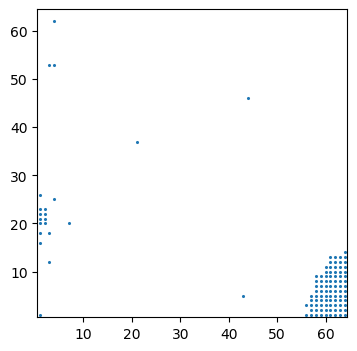

PyObject <matplotlib.collections.PathCollection object at 0x7feb55adc590>

In [5]:
# The localization of the unusable channes in the MMEA
ff=figure(figsize=(4,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
# Isabel Nuevos
#scatter(canales[:,3], canales[:,2], s=0.5)
#Franco Viejos
scatter(malos[:,2], malos[:,1], s=1.5)

In [6]:
# a helper array to contain all "non bad" channels
mm=rowstoset(malos)
nomalos=zeros(4096,2)
for j=1:64, k=1:64
    nomalos[(j-1)*64+k,1]=j
    nomalos[(j-1)*64+k,2]=k
end
nomm=rowstoset(nomalos)
setdiff!(nomm, mm);
bb=rowstoset(canales)
nomalosnibuenos=setdiff(nomm,bb);

In [7]:
include("../Preprocesamiento/SpikeDetect01.jl")

spikedetect (generic function with 1 method)

In [8]:
nnspikes=zeros(Int32, 64,64)
for j=1:64, k=1:64
    nnspikes[j,k]=length(spikedetect(lfp[j,k,:], umbra=-120))
end

A quick visual test to show the channels which have spikes detected on them. The higher counts fall over he CA3 region of the hippocampus.

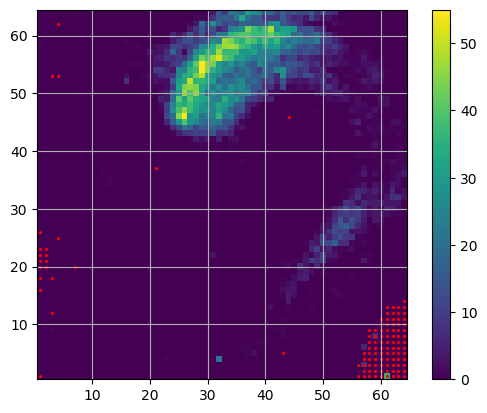

In [9]:
bla=imshow(nnspikes, origin="lower", extent=[0.5,64.5, 0.5,64.5])
colorbar(bla)
scatter(malos[:,2], malos[:,1], s=1.5, color="red")
grid()

In [10]:
lfpex=lfp[53,29,:];
sus=spikedetect(lfpex, umbra=-100);
susstd=spikedetect(lfpex);

Here we show the trace of the recording in microVolts for an exemplary channel. The spike detection shows the point of maximal negative deflection from the basal noise.

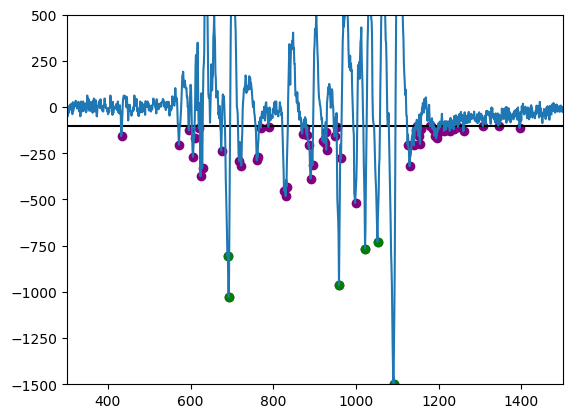

PyObject <matplotlib.collections.PathCollection object at 0x7feb388a4dd0>

In [11]:
figure()
ylim(-1500,500)
xlim(300, 1500)
plot(lfpex)
hlines(-100,xmin=1, xmax=2000)
#scatter(sus, lfpex[sus], color="red")
scatter(sus, lfpex[sus], color="purple")
scatter(susstd, lfpex[susstd], color="green")


We put all the "non bad" meassurements in a single string, so as to perform statistics over them.

In [12]:
lfpchorizo=[0]

for q in nomm
    j=q[1]
    k=q[2]
    lfpex=vec(lfp[j,k,:])
    lfpchorizo=vcat(lfpchorizo, lfpex)
end


In [13]:
sigmachorizo=std(lfpchorizo)

59.315647f0

We perform the same trick using only the "not bad but not active channels", that is, those channels that show good recording but no physiological activity. Their characterization would help us to identify the background noice.

In [14]:
lfpchorizoruido=[0]

for q in nomalosnibuenos
    j=q[1]
    k=q[2]
    lfpex=vec(lfp[j,k,:])
    lfpchorizoruido=vcat(lfpchorizoruido, lfpex)
end

In [15]:
sigmaruido=std(lfpchorizoruido)

21.146173f0

In [16]:
function dictarrayordenado(dd::Dict)
    llaves=sort(collect(keys(dd)))
    nnll=length(llaves)
    result=zeros(nnll,2)
    for k in 1:nnll
        result[k,1]=llaves[k]
        result[k,2]=dd[llaves[k]]
    end
    #result=result[sortperm(result[:, 1]), :]
    return result
end

dictarrayordenado (generic function with 1 method)

Some Channels show deviations from the expected noise, but are not "active channels". We call them "Happy Friends", and are misbehaved electrodes. Their traces look vaguely physiological, but on visual inspection reveal that they are just highly noisey channels. Below we show the trace of one of them.

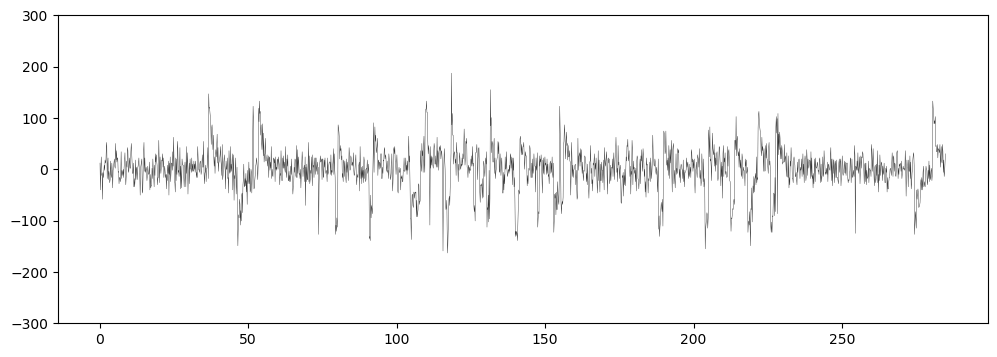

4 32 bla

In [17]:
figi=figure(figsize=(12,4))
ylim(-300,300)

#for q in 1:size(canales,1)
rau=25
rango=(5:5).+rau
for q in rango

    j=canales[q,1]
    k=canales[q,2]
    lfpex=vec(lfp[j,k,:])
    tiempo=(1:nmax)./freq
    plot(tiempo,lfpex, lw=0.3, c=(0.2,0.2,0.2))
    print(j, " ", k, " bla")
end
#figi.patch.set_facecolor("xkcd:salmon")
#figi.patch.set_facecolor((1.0, 0.47, 0.42))

In [18]:
size(canales,1)

1056

In [19]:
# Helper function to renormalize the data to a.u.
function renormvec(datos::Array)
    mu=mean(datos)
    result=datos.-mu
    sig=std(result)
    if sig !=0
    result=result./sig
    end
    return result
end

renormvec (generic function with 1 method)

In order to classify the channels, we impose a polar ordering using a choosen electrode as the center. In this way the channels get ordered from CA3 proximal to CA1 distal

In [20]:
yxref=[39,40]
# okey menso a barreconjunto le tienes que pasar solo las columnas con coordenadas!!!
orderchans=barreconjuntoyordena(canales[:,1:2], yxref);

alfamin = 0.015623728620476831


We show below the order impossed on the "active" channels. Blue are the first on the list, yellow the last ones.

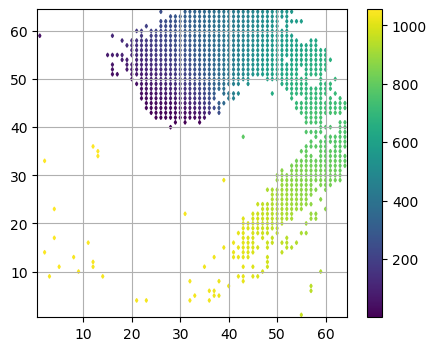

In [21]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
#scatter(canales[:,2], canales[:,1], s=0.5)
scatter(orderchans[:,2], orderchans[:,1], marker="d",s=3, cmap="viridis", c=orderchans[:,3])
colorbar()
grid()

#### The binarization process: different criteria

There are different rules to select adecuate bin sizes in one dimensional data. The rules try to make the histogramm "smooth enough" and without gaps. We are compeled to do so, because we asume that the phenomena that produces our data is continous in nature, and therefore, it induces a continous probabilty density function. We are looking for a histogram that captures the general shape of this pdf. If the bins are to narrow, we may end up with many empty bins, or many bins with just one data point inside it. If they are too big they may not look like the shape of the underlying distribution.

Below we define three functions that would give us three different bin sizes for the same data: The Freed and Diaconis criterium, the Scott criterium and the square root of the number of data criterium. The first two use statistical characterization over the values of the sample, such as the interquantil range or the standard deviation. Those are measures of the spread of the center of the distribution. The last one only takes into account the number of samples. Also we set up an "heuristic" binsize, in which we do not take into account anything of the sample, but we simply pick a binsize, and set up a range. In our case the range is from $-2000 \mu V$ to $2000 \mu V$

In [22]:
function freediaconisbin(datos)
    # Freedman and Diaconis
    n=length(datos)
    m=iqr(datos)
    result=2*m/cbrt(n)
    return result
end

function scottbin(datos)
    n=length(datos)
    m=std(datos)
    result=3.49*m/cbrt(n)
end

function sqrbin(datos)
    n=length(datos)
    sq=sqrt(n)
    (mir,mar)=extrema(datos)
    result=(mar-mir)/sq
end

function mejorbin(datos; deltax=1)
    # estas asumiendo que los datos se ven bastante gaussianos!
    # y que estan discretizados en pasos deltax

    (fd, sb, sq)=(freediaconisbin(datos), scottbin(datos), sqrbin(datos))
    bines=[fd, sb, sq, sig]
    nombins=["fd", "sb", "sq", "sig"]
    # pa debuquear
    bines=[sq]
    nombins=["sq"]
    
    masquedx=bines[bines.>deltax]
    nommas=nombins[bines.>deltax]
    if isempty(masquedx)
        result=("dd", deltax) 
    else 
        aver=findmin(masquedx)
        elbueno=nommas[aver[2]]
        elbuenon=aver[1]
       result=(elbueno, elbuenon)
    end
    return result
end

function fuu(x::String)
    result=0
    if x=="dd"
        result=0
    elseif x=="fd"
        result=1
    elseif x=="sb"
        result=2
    elseif x=="sq"
        result=3
    elseif x=="sig"
        result=4
    end
    return result
end

fuu (generic function with 1 method)

The next helper function call the different bin size function and produce an histogram of the input data.

In [23]:
# FUnctions that produce the histograms

function histoptimo(datos::Array; deltax=1)
    bine=mejorbin(datos, deltax=deltax)
    (vmin,vmax)=extrema(datos)
    rango=vmin:bine:vmax+bine
    result=fit(Histogram, datos,rango)
end

function histobin(datos::Array; deltax=1, method="none")
  
    if method=="none"
        bin=deltax
    elseif method=="fd"
        bin=freediaconisbin(datos)
   elseif method=="sb"
        bin=scottbin(datos)
    elseif method=="sq"
        bin=sqrbin(datos)
    end
    
    if bin==0
        bin=deltax
    end
    (vmin, vmax)=extrema(datos)
    rango=vmin:bin:vmax+bin
    h=fit(Histogram, datos, rango)
    result=(bin,h)
end

function histoheuristic(datos::Array, bin=4.7)
    vmin,vmax=(-2000,2000)
    n=length(datos)
    rango=vmin:bin:vmax+bin
    h=fit(Histogram, datos, rango)
    result=(bin,h)
end




histoheuristic (generic function with 2 methods)

This function doesn't produce a binarized histogram, bit it actually produces the finest discretization avaible for our data: the grain of our data is the resolution of the measuring device.

In [24]:
entrocountmap=zeros(64,64)
ncountmap=zeros(64,64)

for j=1:64,k=1:64
    dict=countmap(lfp[j,k,:])
    valores=values(dict)
    pesos=valores./sum(valores)
    entrocountmap[j,k]=entropy(pesos)
    ncountmap[j,k]=length(valores)
end

In [25]:
lfpe=lfp[40,25,:]
ddr=countmap(lfpe)
valores=collect(keys(ddr))
minimum(valores[valores.>0])

2.0141602f0

We calculate Shanon's entropy for the different histograms obtained above. We do it for all the channels that are marked as "non bad".

In [26]:

comparaentropias=zeros(64,64,4)
metos=["fd", "sb", "sq", "heu"]
bines=[0,0,0,0]

for m in 1:3
    metodo=metos[m]
    for j=1:64,k=1:64
        lfpex=vec(lfp[j,k,:])
     #   println("$j, $k, $metodo")
        hhh=histobin(lfpex, method=metodo)
        hwei=hhh[2].weights./sum(hhh[2].weights)
        comparaentropias[j,k,m]=entropy(hwei)
    end
end

m=4
metodo=metos[m]
    for j=1:64,k=1:64
        lfpex=vec(lfp[j,k,:])
        hhh=histoheuristic(lfpex)
        sumum=sum(hhh[2].weights)
        if sumum!=0
        hwei=hhh[2].weights./sumum
        else
        hwei=hhh[2].weights
        end
        comparaentropias[j,k,m]=entropy(hwei)
    end

Below we plot as color maps the different entropies so obtained. 

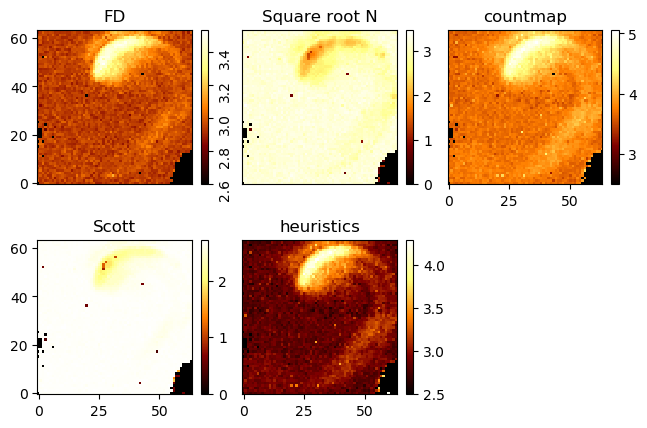

In [86]:
fig, (uno, dos, tres, cuatro, cinco, seis)=subplots(2,3, figsize=(7.5,5))

aa=uno.imshow(comparaentropias[:,:,1], origin="lower", cmap="afmhot", vmin=2.5)
uno.set_title("FD")
uno.set_xticks([])
cb1=colorbar(aa, ax=uno, fraction=0.045)
onde=cb1.get_ticks()
onde=round.(onde, digits=1)
cb1.ax.set_yticklabels(onde,rotation=90)

bb=dos.imshow(comparaentropias[:,:,2], origin="lower",  cmap="afmhot")
dos.set_title("Scott")
#dos.set_yticks([])
#dos.set_xticks([])
colorbar(bb, ax=dos, fraction=0.045)

cc=tres.imshow(comparaentropias[:,:,3], origin="lower",  cmap="afmhot")
tres.set_title("Square root N")
tres.set_yticks([])
tres.set_xticks([])
colorbar(cc, ax=tres, fraction=0.045)

dd=cuatro.imshow(comparaentropias[:,:,4], origin="lower",  cmap="afmhot", vmin=2.5)
cuatro.set_title("heuristics")
cuatro.set_yticks([])
colorbar(dd, ax=cuatro, fraction=0.045)

dd=cinco.imshow(entrocountmap, origin="lower",  cmap="afmhot", vmin=2.5)
cinco.set_title("countmap")
cinco.set_yticks([])
colorbar(dd, ax=cinco, fraction=0.045)

#seis.scatter(malos[:,2], malos[:,1], s=1.5)
seis.axis("off")
savefig("ComparaEntropias01.png")

In [84]:
onde

6-element Array{Float64,1}:
 2.6000000000000005
 2.8000000000000003
 3.0000000000000004
 3.2
 3.4000000000000004
 3.6000000000000005

#### Discusion of the Entropies with different bin sizes criteria.

Inspecting the above figures, it shall be obvious that Shannon's Entropy depends highly on the partition of the range of data. The different color maps don't differ only in scale: they behave cualitatively very differently. Both the Scott and the Square Root show the opposite behaviour as the Freed-Diaconis and the Heuristic fixed method. In the former the higher entropy is on the noise channels, the later have the higher entropy on the very active CA3 region and their neighbourhood (we discuss the countmap method at the end). Why is that and what does it mean?

Let us recant some propierties of Shannon Entropy. In a finite alphabet, the higher entropy goes to the flatter distribution. If all the symbols have the same probabilty, we get the maximum entropy. Also, a distribution with more symbols tends to also have a higher entropy, unless the symbols have very different probabilites. The different criteria for obtaining the optimal bin size take into account that there may be a continous distribution underneath it, so we are optimizing in search of it. But every channel produces a different bin size. Scott and Square root methods are very sensible to outliers, (the second one is actually dependent solely on the extrema, that is, the more outliers of them all), so they tend to produce larger bins. If the channel is active, we end with some bins that are large enough to contain all noise contribution and others that contain the activity. On the other hand,the noisey channels produce smaller bins, and the distribution of noise tend to be more homogenoeus, like a truncated gaussian. This will produce a higher entropy, as we have more bins, with a relatively flatter distribution.

In the Freed Diaconis method, we use the interquantile range as a ruler, so it is more stable in front of outliers. That makes the binsize more consistent across channels, and therefore, the active channels tend to have a larger spread of probabilites over more or less the same alphabet, giving more Entropy to channels with more diverse signals. The heuristic criterium behaves more like this, as we use the exact same binsize and number of bins for all channels. 

It turns out to be that histograms that are optimized to find a continous distribution are inconsistent to estimate the Shannon Entropy, and this is rightly so: the Differential Entropy is NOT the limit of Shannon's entropy, so that any continous distribution can not induce a consistent discrete entropy without taking into account the partition. 

This gives us the reason to explore our true limiting partition. Our apparatus has an intrinsec discrete alphabet: the measurements are given in integer multiples of $2.014 \mu V$, so our symbols are acctually those discrete values of the electric Voltage. The countmap function gives us an histogram of those discrete values. The entropy thus calculated is qualitatively similar to the Freed Diaconis Criterium, but with higher values, as it maximizes the symbols. Moreover, it also avoids misplacing measurements in the same basket, leaving other symbols empty. 

Given that by definition empty bins do not contribute to the entropy, we can ask ourselves the size of the alphabet used on each channel. This is shown below. It can be seen that the higher entropy of the countmap method is almost sollely dependent on the number of symbols used for its calculation.

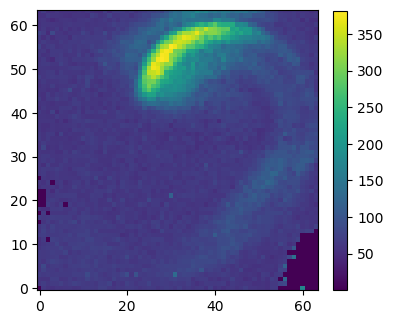

PyObject <matplotlib.colorbar.Colorbar object at 0x7feb383a9e10>

In [28]:
ff=figure(figsize=(4,4))
ncuo=imshow(ncountmap, origin="lower")
colorbar(ncuo, fraction=0.045)

We may think that we have an optimal alphabet for calculating the entropy. At least is the Alphabet that our apparatus produces, and we are not manipulating the data. For calculating the Entropy in each channel sepparately, this may be the apropiate route. But it turns out that for calculating the derived causality measures, this method turns out to be excesively fine-grained. Let us recall the definitions of Mutual Information and Transfer Entropy.

## Mutual Information

The Mutual Information is defined by the next equation. Let $X, Y$ be two random processes or variables,
each with probability given by $P_X(x), P_Y(y)$. That is, the probability in space $X$ of getting the value $x$ is given by $P_X(x)$, and correspondingly for $Y$, and the joint event, $(X,Y)$. Then the Mutual Information is given by
$$
I(X;Y)=\sum_{x,y} P_{X,Y}(x,y) \log \frac{P_{X,Y}(x,y)}{P_X(x)P_Y(y)}
$$
Observe the resemblance to Shannons Entropy for the joint distribution. Notice that it can be thought of the negative Shanon Entropy for the joint variables minus the wheighted individual contribution. 

For obtaining measures such as as this or the Transfer Entropy we need to compare the joint distribution of symbols on two different channels. The joint symbols that will make the alphabet of the joint messages exists in the cartessian product of two alphabets. By looking the last figure, we may estimate that the active Channels have alphabets with over 250 symbols. The cartesian product would have 62500 symbols. Most of them would have frequency zero, and a very large sector would have occurences of about 1 or 2 events. This will inflate a lot the Joint Entropy, and make further measurements artificially high and noisey. We may think that most of the ocurrences would be mostly  spread over noise, thus making it undistinguishable from true noise.

Thus, we are back to our original problem: we have to find an efficent way to symbolize the partition so that it is not excesively coarse or excesively fine. We propose a solution here. 

In [29]:
function transferentropyfd(yyfuture::Array, yypast::Array, xxpast::Array)
    hfd=histofreediaconis(yyfuture,yypast,xxpast)
    pesos=hfd.weights./sum(hfd.weights)
    #checa que conserva su "dimensionalidad" en los indices
    pypast=sum(pesos, dims=[1,3])
    pypastxpast=sum(pesos, dims=1)
    pyfutpypast=sum(pesos, dims=3)

    (KK,LL,MM)=size(pesos)
    
    sumatum=0
    
    for k=1:KK, l=1:LL, m=1:MM
        aux1=pesos[k,l,m]*pypast[1,l,1]
        aux2=pypastxpast[1,l,m]*pyfutpypast[k,l,1]
        if aux1 !=0  && aux2 !=0
            aux3=log(aux1/aux2)
            sumatum+=pesos[k,l,m]*aux3
        end
    end
    
    return sumatum
    
end


transferentropyfd (generic function with 1 method)

In [30]:
tau=round(Int, 5*freq)
xx=lfp[56,30,:]
yy=lfp[56,40,:]
xf=xx[tau:end]
xp=xx[1:end-tau+1]
yp=yy[1:end-tau+1]
transferentropyfd(xf,xp,yp)

UndefVarError: UndefVarError: histofreediaconis not defined

In [31]:
rrr=histofreediaconis(xx,yy)
rx=sum(rrr.weights, dims=2)
ry=sum(rrr.weights, dims=1)

UndefVarError: UndefVarError: histofreediaconis not defined

In [32]:
scatter(1:length(rx),vec(rx), s=3)

UndefVarError: UndefVarError: rx not defined

In [33]:
function histocountmap(xxs::Array)
    dicto=countmap(xxs)
    ll=length(dicto)
    bla=zeros(ll,2)
    j=1
    for k in sort(collect(keys(dicto)))
        bla[j,1]=k
        bla[j,2]=dicto[k]
        j+=1
    end
    return bla
end

function histocountmap(xxss::Array...)
    valores=collect(zip(xxss...))
    dicto=countmap(valores)
    ll=length(dicto)
    tantas=length(xxss)
    bla=zeros(ll, tantas+1)
    j=1
    for k in sort(collect(keys(dicto)))
        for l in 1:tantas
            bla[j,l]=k[l]
        end
        bla[j,tantas+1]=dicto[k]
        j+=1
    end
    return bla
end

histocountmap (generic function with 2 methods)

In [34]:
rangg=250:1500
xxpas=xx[rangg]
yypas=yy[rangg]
yyfut=yy[rangg.+28];

In [35]:
haha=histocountmap(yyfut,yypas,xxpas)
countmap(haha[:,end])

Dict{Float64,Int64} with 2 entries:
  2.0 => 4
  1.0 => 1243

In [36]:
function entrocountmap(xxs::Array)
    cuentas=histocountmap(xxs)
    pdfval=cuentas[:,2]./sum(cuentas[:,2])
    suma=0
    for j in pdfval
        suma+=j*log(j)
    end
    return (-suma)
end

function entrocountmap(xxss::Array...)
    cuentas=histocountmap(xxss...)
    #ligeramente diferente ¿sera generalizable?
    pdfval=cuentas[:,end]./sum(cuentas[:,end])
    suma=0
    for j in pdfval
        suma+=j*log(j)
    end
    return (-suma)
end


ErrorException: cannot define function entrocountmap; it already has a value

In [37]:
function transferentropycm(yyfuture, yypast, xxpast)
    hcm=histocountmap(yyfuture,yypast,xxpast)
    pesos=hcm[:,end]
    pesos=pesos./sum(pesos)
    #checa que conserva su "dimensionalidad" en los indices
    pypast=histocountmap(yypast)
    pypastxpast=histocountmap(yypast,xxpast)
    pyfutpypast=histocountmap(yyfuture,yypast)
    
    

    (KK,LL,MM)=size(pesos)
    
    sumatum=0
    
    for k=1:KK, l=1:LL, m=1:MM
        aux1=pesos[k,l,m]*pypast[1,l,1]
        aux2=pypastxpast[1,l,m]*pyfutpypast[k,l,1]
        if aux1 !=0  && aux2 !=0
            aux3=log(aux1/aux2)
            sumatum+=pesos[k,l,m]*aux3
        end
    end
    
    return sumatum
    


end

transferentropycm (generic function with 1 method)

In [38]:
fu=histocountmap(xx,yy)
bar=entrocountmap(xx,yy)

MethodError: MethodError: objects of type Array{Float64,2} are not callable
Use square brackets [] for indexing an Array.

In [39]:
fufu=fu[fu[:,3].>2,:]
typeof(fufu)

Array{Float64,2}

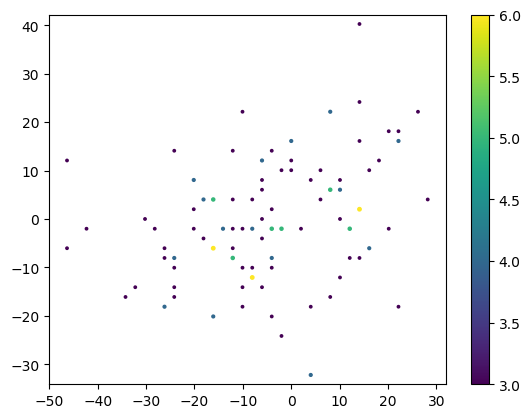

(-50.053800503667674, 31.926359097417667, -35.85500884745723, 43.91128698707785)

In [40]:
eqs=fufu[:,1]
yes=fufu[:,2]
siz=fufu[:,3]
scatter(eqs,yes, s=siz, c=siz)
colorbar()
axis("equal")

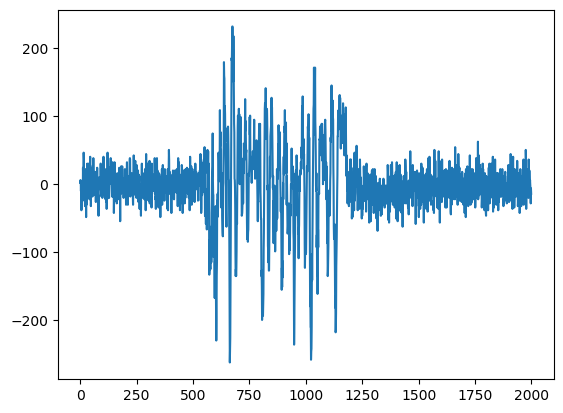

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb3b2503d0>

In [41]:
plot(yy)

In [42]:
hetasfd=zeros(64,64)
hetascm=zeros(64,64)
for j=1:64, k=1:64
    ejemplo=lfp[j,k,:]
    hetasfd[j,k]=sacaentropiafd(ejemplo)
    hetascm[j,k]=entrocountmap(ejemplo)
end


UndefVarError: UndefVarError: sacaentropiafd not defined

In [43]:
dh=hetasfd-hetascm;
#map!(x->round(x ;digits=3), dh)

64×64 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

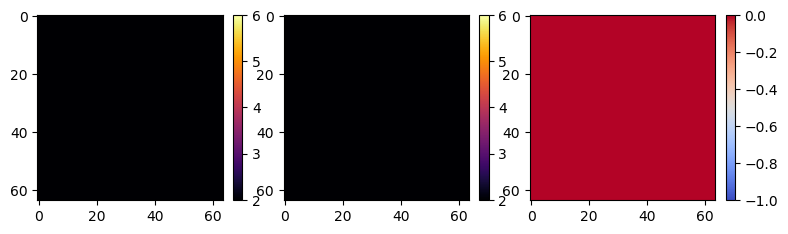

PyObject <matplotlib.colorbar.Colorbar object at 0x7feb33fd7f90>

In [44]:
fig, (uno, dos, tres)=subplots(1,3, figsize=(9,4))
bmin=2
bmax=6
fafa=uno.imshow(hetasfd, origin="upper", cmap="inferno", vmin=bmin, vmax=bmax)
colorbar(fafa, ax=uno, fraction=0.045)
fufu=dos.imshow(hetascm, origin="upper", cmap="inferno", vmin=bmin, vmax=bmax)
colorbar(fufu, ax=dos, fraction=0.045)
fefe=tres.imshow(dh, origin="upper", cmap="coolwarm", vmin=-1, vmax=0)
colorbar(fefe, ax=tres, fraction=0.045)


In [45]:
mean(hetascm)

0.0

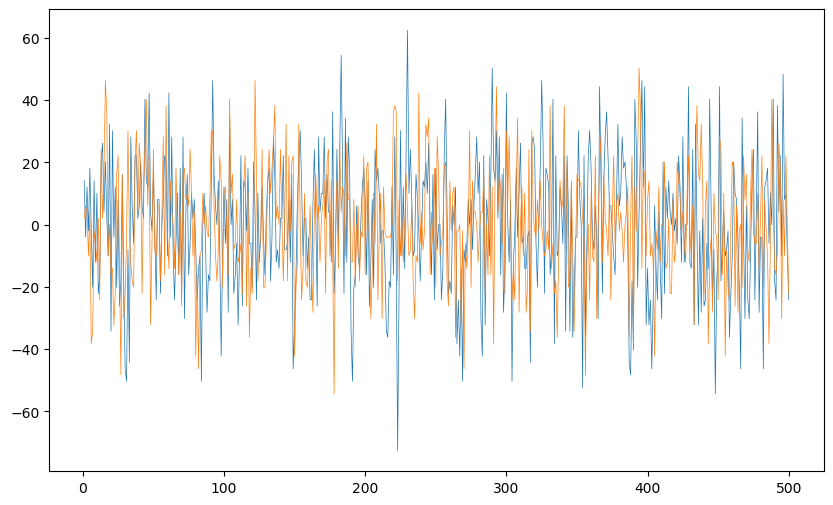

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb33f24390>

In [46]:
f=figure(figsize=(10,6))
rang=1:5*10^2
plot(rang,xx[rang], lw=0.5)
plot(rang,yy[rang], lw=0.5)

In [47]:
vallfpdisc=zeros(64,64)
hfdiacounts=zeros(64,64)
iqrs=zeros(64,64)
for j=1:64, k=1:64
    haux=0
    try
        haux=histofreediaconis(lfp[j,k,:])
          hfdiacounts[j,k]=length(haux.edges[1])
    catch e
    end
    iqrs[j,k]=iqr(lfp[j,k,:])
  
    vallfpdisc[j,k]=length(countmap(lfp[j,k,:]))
end

In [48]:
iqr(vec(iqrs))
mean(vec(iqrs))
mode(vec(iqrs))


26.18408203125

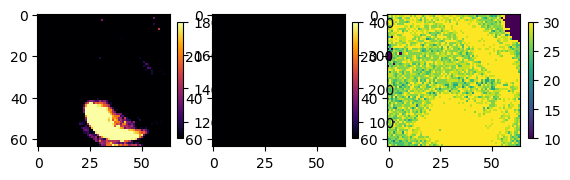

PyObject <matplotlib.colorbar.Colorbar object at 0x7feb3b275f50>

In [49]:
figure(figsize=(12,8))
fig, (uno, dos,tres)=subplots(1,3)
fafa=uno.imshow(vallfpdisc, origin="upper", vmin=110, vmax=180, cmap="inferno")
colorbar(fafa, ax=uno, fraction=0.04)
fufu=dos.imshow(hfdiacounts, origin="upper", vmin=50, vmax=400, cmap="inferno")
colorbar(fufu, ax=dos, fraction=0.04)
fefe=tres.imshow(iqrs, vmin=10,vmax=30)
colorbar(fefe, ax=tres, fraction=0.04)


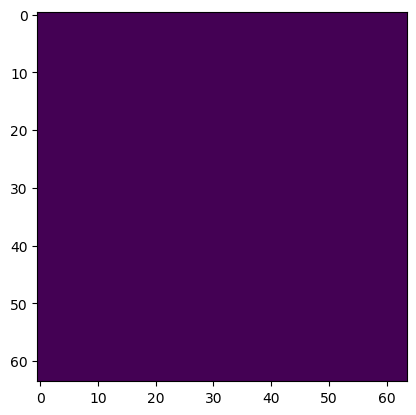

PyObject <matplotlib.image.AxesImage object at 0x7feb3b2afe10>

In [50]:
imshow(hfdiacounts)

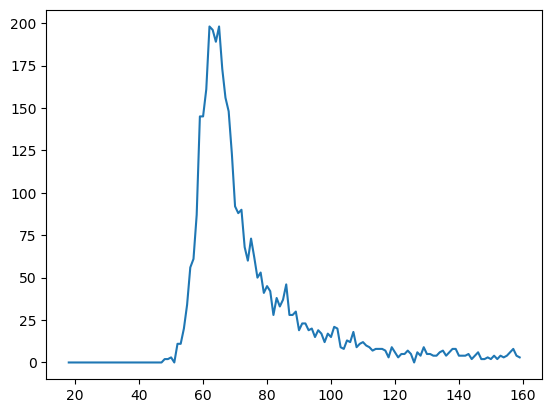

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb33d7fcd0>

In [51]:
vv=vec(vallfpdisc)
ll=length(countmap(vv))
jhh=fit(Histogram, vv, 18:160)
ta=jhh.weights
tu=jhh.edges[1]
size(collect(tu[1:end-1])), size(ta)
plot(tu[1:end-1], ta)

In [52]:
typeof(vv)

Array{Float64,1}

In [53]:
function sacaentropiafd(datosX::Array, datosY::Array)
    # ambos arrays deben ser igual de largos ???
    binsizeX=freediaconis(datosX)
    binsizeY=freediaconis(datosY)
    if (binsizeX==0 || binsizeY==0)
        error(" ¡Esto que, no tiene variacion en los datos!")
    else
        (viX,vfX)=extrema(datosX)
        (viY,vfY)=extrema(datosY)
        rangoX=viX:binsizeX:vfX
        rangoY=viY:binsizeY:vfY
        
        histodo=fit(Histogram, (datosX, datosY), (rangoX, rangoY))
        
        pdf=histodo.weights
        pdf=pdf./sum(pdf)
        result=entropy(pdf)
        return result
        #return (result, histodo)
    end

end

sacaentropiafd (generic function with 1 method)

In [54]:
function infomutua(datosX::Array, datosY::Array)
    hetaX=sacaentropiafd(datosX)
    hetaY=sacaentropiafd(datosY)
    hetaXY=sacaentropiafd(datosX,datosY)
    result=hetaX+hetaY-hetaXY
    return result
end

infomutua (generic function with 1 method)

In [55]:
nchan=size(orderchans, 1)
hetas=zeros(nchan)
for j=1:nchan
    reng,col=orderchans[j,1],orderchans[j,2]
    ejemplo=lfp[reng,col,:]
    hetas[j]=sacaentropiafd(vec(ejemplo))
end

MethodError: MethodError: no method matching sacaentropiafd(::Array{Float32,1})
Closest candidates are:
  sacaentropiafd(::Array, !Matched::Array) at In[53]:3

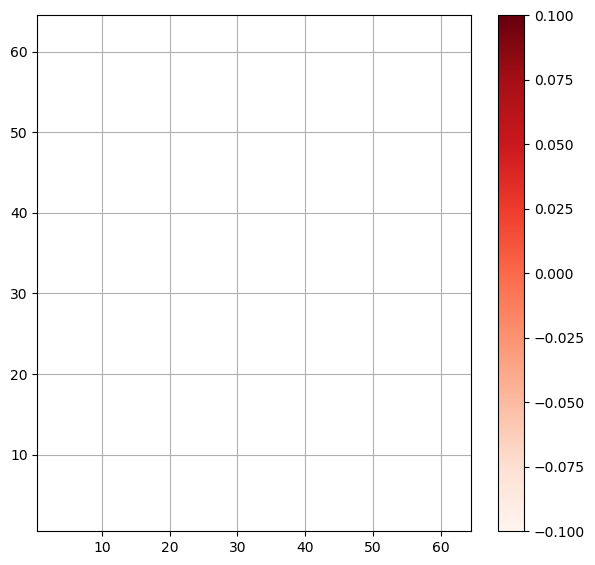

In [56]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(orderchans[:,2], orderchans[:,1], s=hetas, c=hetas, cmap="Reds")
colorbar()
grid()

In [57]:
hetacut=quantile(hetas, 0.90)
tuabueta=findall(x->x>hetacut,hetas);
auxchans=hcat(orderchans[tuabueta,:], hetas[tuabueta])
naux=size(auxchans,1)

0

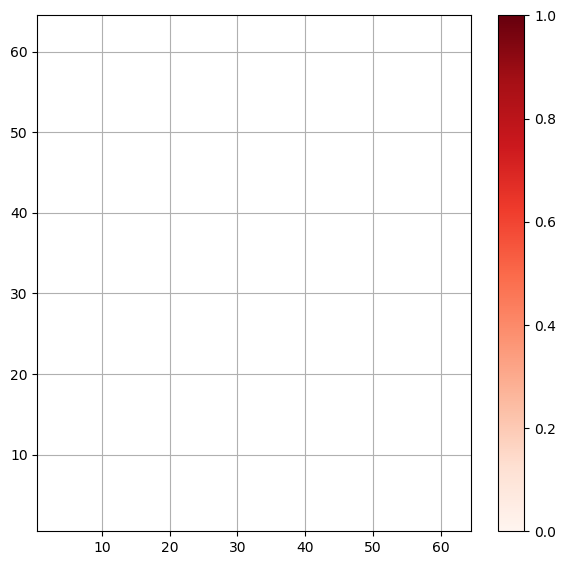

In [58]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(auxchans[:,2], auxchans[:,1], s=auxchans[:,4], 
    c=auxchans[:,4],marker="s", cmap="Reds")
colorbar()
grid()

In [59]:
imutres=zeros(nchan)
refe=[50,28]
fijo=lfp[refe[1], refe[2],:]
for j=1:nchan
    reng,col=orderchans[j,1],orderchans[j,2]
    ejemplo=lfp[reng,col,:]
    imutres[j]=infomutua(fijo, ejemplo)
end

MethodError: MethodError: no method matching sacaentropiafd(::Array{Float32,1})
Closest candidates are:
  sacaentropiafd(::Array, !Matched::Array) at In[53]:3

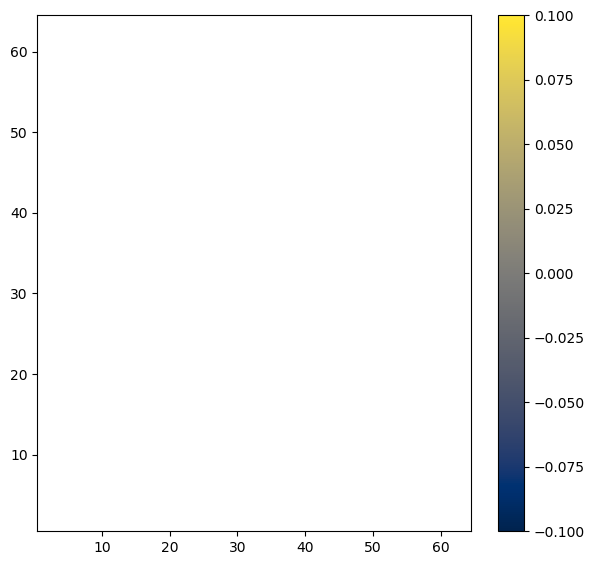

PyObject <matplotlib.colorbar.Colorbar object at 0x7feb33b33e50>

In [60]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(orderchans[:,2], orderchans[:,1], s=imutres.*5, c=imutres, cmap="cividis", marker="s")
colorbar()
#grid()

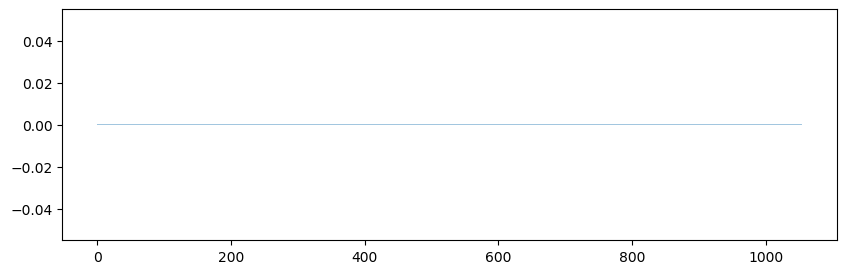

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb33a4f090>

In [61]:
figure(figsize=(10,3))
plot(hetas, lw=0.3)

In [62]:
mutinfo=zeros(naux,naux);
crossentro=zeros(naux,naux)

@time for j=1:naux
    for k=j:naux
        
        reng1,col1=(auxchans[j,1], auxchans[j,2])
        reng2,col2=(auxchans[k,1], auxchans[k,2])
        
        reng1=round(Int32, reng1)
        reng2=round(Int32, reng2)
        
        col1=round(Int32, col1)
        col2=round(Int32, col2)
        
        
        
        dat1=lfp[reng1, col1,:]
        dat2=lfp[reng2, col2,:]
        
        mutinfo[j,k]=infomutua(dat1,dat2)
        mutinfo[k,j]=mutinfo[j,k]
    
    end
end

  0.000005 seconds (1 allocation: 32 bytes)


In [63]:
for j=1:naux
    mutinfo[j,j]=0
end

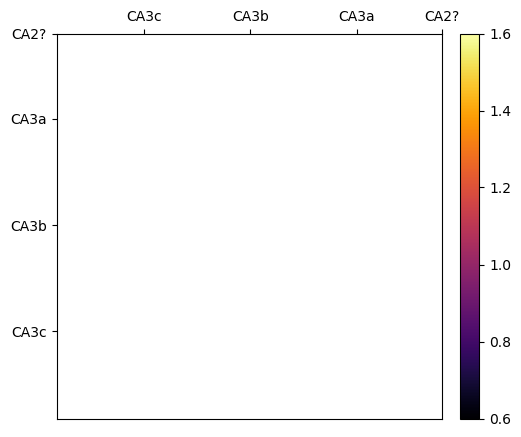

PyObject <matplotlib.colorbar.Colorbar object at 0x7feb339e3ed0>

In [64]:
figure(figsize=(6,5))

imshow(mutinfo, cmap="inferno", interpolation="nearest", vmin=0.6, vmax=1.6)

#onde=[55, 125, 200, 250]
onde=[20, 45, 70, 90]
que=["CA3c","CA3b", "CA3a", "CA2?" ]
tick_params(bottom=false, top=true)
xticks(onde, que)
yticks(onde, que)
tick_params(bottom=false, top=true, labeltop=true, labelbottom=false)

colorbar(fraction=0.046, pad=0.04)

In [65]:
?crossentropy

search: crossentropy crossentro



```
crossentropy(p, q, [b])
```

Compute the cross entropy between `p` and `q`, optionally specifying a real number `b` such that the result is scaled by `1/log(b)`.
